<a href="https://colab.research.google.com/github/Bhumika-0314/Project/blob/main/Emotion_Detection_using_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving emotion_data_100k.csv to emotion_data_100k.csv


Columns: Index(['Heart Beat', 'Age', 'Activity Level', 'Emotion'], dtype='object')
   Heart Beat  Age Activity Level Emotion
0          85   61         Medium   Happy
1          74   24         Medium   Happy
2          74   70            Low    Calm
3          82   30         Medium   Happy
4          59   33            Low    Calm
Accuracy: 0.7865

Classification Report:
               precision    recall  f1-score   support

       Angry       1.00      1.00      1.00      2231
        Calm       1.00      0.79      0.88      5625
       Happy       1.00      0.70      0.82     10298
         Sad       0.30      0.99      0.46      1846

    accuracy                           0.79     20000
   macro avg       0.82      0.87      0.79     20000
weighted avg       0.93      0.79      0.83     20000



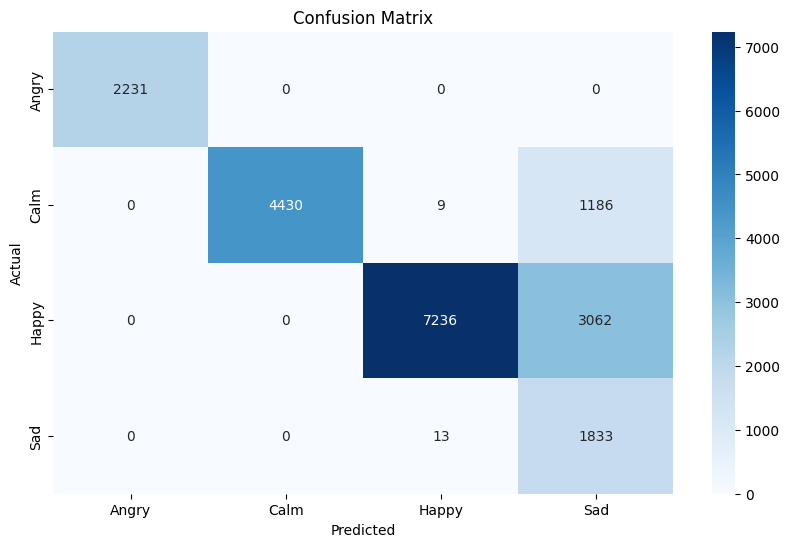

In [ ]:
#rf
# STEP 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2: Load Dataset
df = pd.read_csv('emotion_data_100k.csv')

# STEP 3: Explore Columns
print("Columns:", df.columns)
print(df.head())

# STEP 4: Label Encode target column
le = LabelEncoder()
df['EmotionEncoded'] = le.fit_transform(df['Emotion'])

# STEP 5: Split Features and Target
X = df.drop(['Emotion', 'EmotionEncoded'], axis=1)
y = df['EmotionEncoded']

# STEP 5.5: Convert non-numeric columns to numeric
X = pd.get_dummies(X)

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 8: Train Model with Poor Configuration
model = RandomForestClassifier(n_estimators=50,  # Decreased the number of trees
                               max_depth=5,     # Limiting depth of trees
                               random_state=42,
                               class_weight='balanced')  # Using balanced class weights that may hurt performance
model.fit(X_train_scaled, y_train)

# STEP 9: Evaluate Model
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# STEP 10: Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# STEP 1: Load Dataset
df = pd.read_csv('emotion_data_100k.csv')

# STEP 2: Encode 'Emotion' labels
le = LabelEncoder()
df['EmotionEncoded'] = le.fit_transform(df['Emotion'])

# STEP 3: Ordinal Encode 'Activity Level'
df['Activity Level'] = df['Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# STEP 4: Split into Features and Target
X = df.drop(['Emotion', 'EmotionEncoded'], axis=1)
y = to_categorical(df['EmotionEncoded'])

# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Build MLP Model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))  # Output Layer

# STEP 8: Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 9: Callbacks for Training Optimization
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# STEP 10: Train Model
model.fit(X_train_scaled, y_train,
          epochs=50,
          batch_size=64,
          validation_split=0.2,
          callbacks=[early_stop, reduce_lr],
          verbose=2)

# STEP 11: Evaluate Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nFinal Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1000/1000 - 9s - 9ms/step - accuracy: 0.8211 - loss: 0.4213 - val_accuracy: 0.8388 - val_loss: 0.3421 - learning_rate: 1.0000e-03
Epoch 2/50
1000/1000 - 10s - 10ms/step - accuracy: 0.8371 - loss: 0.3533 - val_accuracy: 0.8450 - val_loss: 0.3327 - learning_rate: 1.0000e-03
Epoch 3/50
1000/1000 - 11s - 11ms/step - accuracy: 0.8378 - loss: 0.3466 - val_accuracy: 0.8453 - val_loss: 0.3277 - learning_rate: 1.0000e-03
Epoch 4/50
1000/1000 - 10s - 10ms/step - accuracy: 0.8395 - loss: 0.3413 - val_accuracy: 0.8445 - val_loss: 0.3267 - learning_rate: 1.0000e-03
Epoch 5/50
1000/1000 - 10s - 10ms/step - accuracy: 0.8405 - loss: 0.3374 - val_accuracy: 0.8456 - val_loss: 0.3249 - learning_rate: 1.0000e-03
Epoch 6/50
1000/1000 - 6s - 6ms/step - accuracy: 0.8403 - loss: 0.3376 - val_accuracy: 0.8454 - val_loss: 0.3237 - learning_rate: 1.0000e-03
Epoch 7/50
1000/1000 - 7s - 7ms/step - accuracy: 0.8411 - loss: 0.3353 - val_accuracy: 0.8454 - val_loss: 0.3250 - learning_rate: 1.0000e-03
Epoch

In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
mlp_pred_classes = np.argmax(model.predict(X_test_scaled), axis=1)


mlp_accuracy = accuracy_score(y_test_labels, mlp_pred_classes)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:

y_mlp = to_categorical(df['EmotionEncoded'])

# Split
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y_mlp, test_size=0.2, random_state=42)

# Feature Scaling
X_train_scaled_mlp = scaler.fit_transform(X_train_mlp)
X_test_scaled_mlp = scaler.transform(X_test_mlp)


In [ ]:
# MLP evaluation
y_test_labels = np.argmax(y_test_mlp, axis=1)
mlp_pred_classes = np.argmax(model.predict(X_test_scaled_mlp), axis=1)
mlp_accuracy = accuracy_score(y_test_labels, mlp_pred_classes)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Random Forest model setup
df = pd.read_csv('emotion_data_100k.csv')

le = LabelEncoder()
df['EmotionEncoded'] = le.fit_transform(df['Emotion'])

X_rf = pd.get_dummies(df.drop(['Emotion', 'EmotionEncoded'], axis=1))
y_rf = df['EmotionEncoded']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf)
X_test_rf_scaled = scaler_rf.transform(X_test_rf)

model_rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, class_weight='balanced')
model_rf.fit(X_train_rf_scaled, y_train_rf)

y_pred_rf = model_rf.predict(X_test_rf_scaled)


from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)


In [ ]:
# Load and process data again for MLP
df = pd.read_csv('emotion_data_100k.csv')
le = LabelEncoder()
df['EmotionEncoded'] = le.fit_transform(df['Emotion'])
df['Activity Level'] = df['Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

X_mlp = df.drop(['Emotion', 'EmotionEncoded'], axis=1)
y_mlp = to_categorical(df['EmotionEncoded'])  # One-hot encoded

X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y_mlp, test_size=0.2, random_state=42)

scaler_mlp = StandardScaler()
X_train_scaled_mlp = scaler_mlp.fit_transform(X_train_mlp)
X_test_scaled_mlp = scaler_mlp.transform(X_test_mlp)

# ... build and train MLP model ...

# Predict
y_test_labels = np.argmax(y_test_mlp, axis=1)
y_pred_mlp = np.argmax(model.predict(X_test_scaled_mlp), axis=1)

mlp_accuracy = accuracy_score(y_test_labels, y_pred_mlp)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


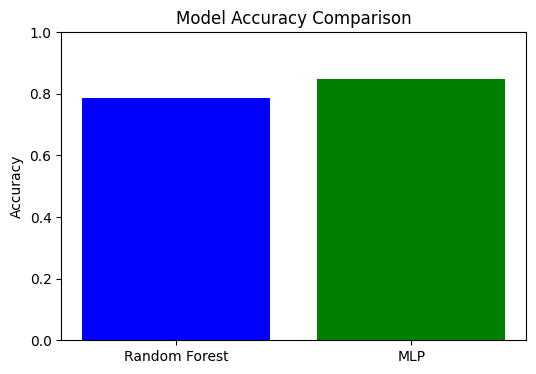

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Random Forest', 'MLP'], [rf_accuracy, mlp_accuracy], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


Epoch 1/50
1000/1000 - 6s - 6ms/step - accuracy: 0.8446 - loss: 0.3190 - val_accuracy: 0.8457 - val_loss: 0.3200 - learning_rate: 1.5625e-05
Epoch 2/50
1000/1000 - 10s - 10ms/step - accuracy: 0.8446 - loss: 0.3189 - val_accuracy: 0.8457 - val_loss: 0.3200 - learning_rate: 1.5625e-05
Epoch 3/50
1000/1000 - 10s - 10ms/step - accuracy: 0.8446 - loss: 0.3190 - val_accuracy: 0.8457 - val_loss: 0.3200 - learning_rate: 1.5625e-05
Epoch 4/50
1000/1000 - 11s - 11ms/step - accuracy: 0.8445 - loss: 0.3191 - val_accuracy: 0.8457 - val_loss: 0.3200 - learning_rate: 1.5625e-05
Epoch 5/50
1000/1000 - 10s - 10ms/step - accuracy: 0.8446 - loss: 0.3189 - val_accuracy: 0.8457 - val_loss: 0.3200 - learning_rate: 7.8125e-06
Epoch 6/50
1000/1000 - 6s - 6ms/step - accuracy: 0.8446 - loss: 0.3190 - val_accuracy: 0.8457 - val_loss: 0.3200 - learning_rate: 7.8125e-06


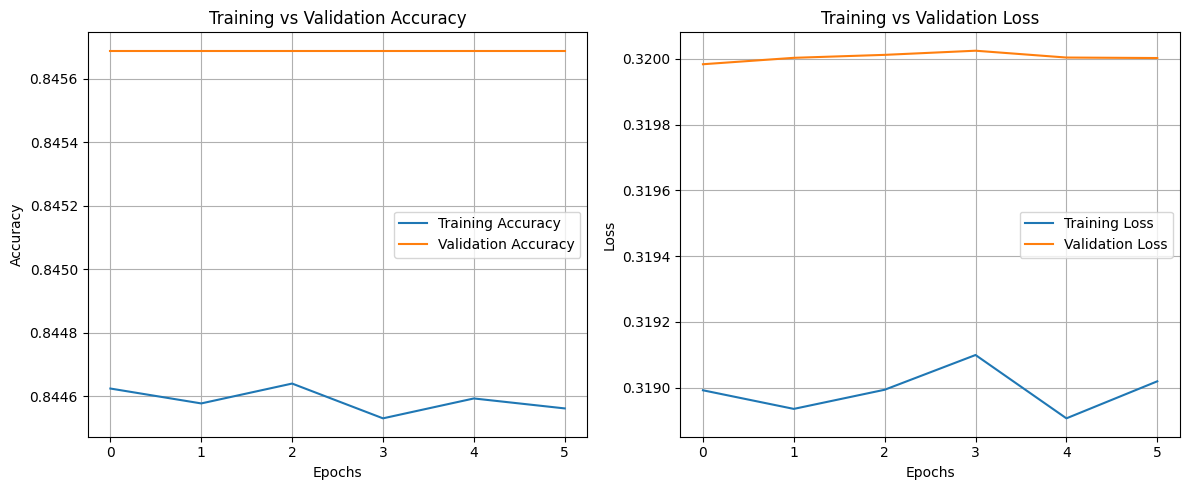

In [ ]:

history = model.fit(X_train_scaled, y_train,
          epochs=50,
          batch_size=64,
          validation_split=0.2,
          callbacks=[early_stop, reduce_lr],
          verbose=2)

# Plot Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


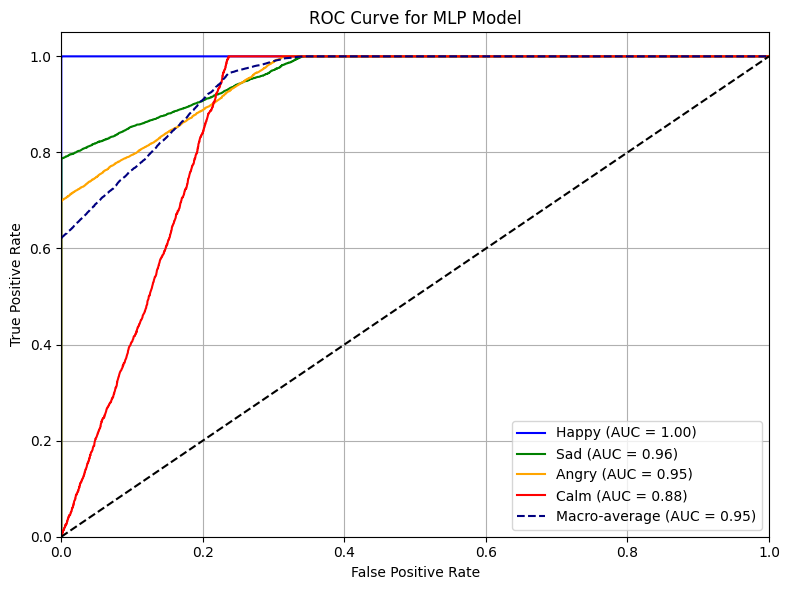

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for test set
y_score = model.predict(X_test_scaled)

# Number of classes
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange', 'red']
class_names = ['Happy', 'Sad', 'Angry', 'Calm']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})',
         color='navy', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
